<a href="https://colab.research.google.com/github/Abhilashpr1997/Sentiment-Analysis-using-CNN-LSTM/blob/main/Sentiment_Analysis_Using_CNN_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![link text](https://img.freepik.com/premium-photo/happy-face-sad-faces_926199-1970445.jpg)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Sentiment Analysis Using CNN-LSTM

# Introduction
In today’s digital age, the exponential growth of user-generated content on social media platforms, forums, and review sites has led to an overwhelming amount of textual data. This data holds valuable insights into public sentiment and opinions, which can significantly influence businesses, marketing strategies, and societal trends. Sentiment analysis, a subfield of natural language processing (NLP), focuses on determining the emotional tone behind a body of text.

This project aims to leverage the capabilities of Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) particularly suited for sequence prediction tasks, to perform sentiment analysis. LSTMs are designed to effectively capture long-range dependencies in sequential data, making them ideal for understanding the context and subtleties of human language. By training the LSTM model on a diverse dataset of labeled text, we can classify sentiments into categories such as positive, negative.

# Objective
To develop a machine learning model based on LSTM networks that can classify the sentiment of product reviews (positive, negative) from an e-commerce platform (e.g., Amazon, Flipkart) or any public dataset.

# Data Story

This dataset contains information about Product name, Product price, Rate, Reviews, Summary and Sentiment in csv format. There are 104 different types of products of flipkart.com such as electronics items, clothing of men, women and kids, Home decor items, Automated systems, so on. It has 205053 rows and 6 columns. Also, if any product doesn't have any review but summary is present then Nan value already added to its blank space.

This dataset has multiclass label as sentiment such as positive, neutral amd negative.The sentiment given was based on column called Summary using NLP and Vader model. Also, after that we manually check the label and put it into the appropriate categories like if summary has text like okay, just ok or one positive and negative we labeled as neutral for better understanding while using this dataset for human languages. On the summary and price column, data cleaning method is already performed using python module called NumPy and Pandas which are famous.You can learn it also through any online resource.

# Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import joblib
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import  Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling1D, Embedding, Conv1D, Flatten, Dense, Input
from keras.layers import Dropout, BatchNormalization, LSTM, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight

# Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sentiment analysis/Dataset-SA.csv")
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


1.First line explain this is a panda dataframe

2.There are 205052 entries.

3.This dataframe contain 6 columns

4.All 6 columns are object(string).

5.Rate column has datatype object, thats a rating column so change to numerical


# Exploratory Data Analysis

In [ ]:
#Checking null values
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24664
Summary,11
Sentiment,0


In [ ]:
#Removed null values and stored
df=df.dropna()

In [ ]:
#confirming null values are removed.
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,0


In [ ]:
#Checking Duplicates
df.duplicated().sum()

25912

In [ ]:
#removing duplicates
df=df.drop_duplicates()

In [ ]:
#Confirming
df.duplicated().sum()

0

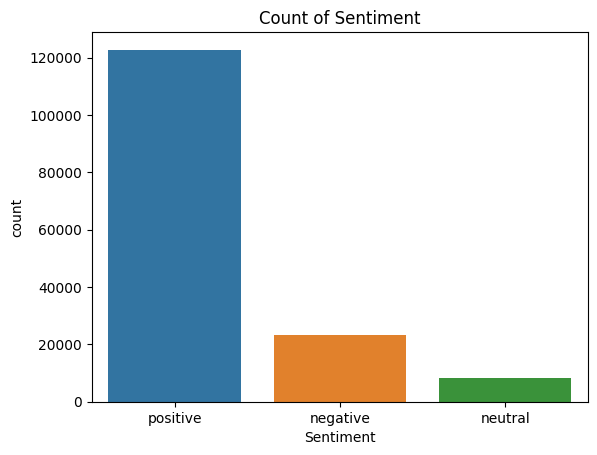

In [ ]:

sns.countplot(x='Sentiment', data=df, hue = 'Sentiment')
plt.title('Count of Sentiment')
plt.show()



This graph explains that positive comments are more often followed by negative comments. neutral commenta are very less

In [ ]:
df['Rate'].value_counts().sort_index()

,count
Rate,
1,17475
2,5279
3,12500
4,30484
5,88726
Bajaj DX 2 L/W Dry Iron,1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise),1
"Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)",1


This columns contain unwanted values so remove values and change datatype into numerical

In [ ]:
df = df[df['Rate'] != 'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)']
df = df[df['Rate'] != 'Bajaj DX 2 L/W Dry Iron']
df = df[df['Rate'] != 'Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)']

In [ ]:
#Changing the datatype of the column
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

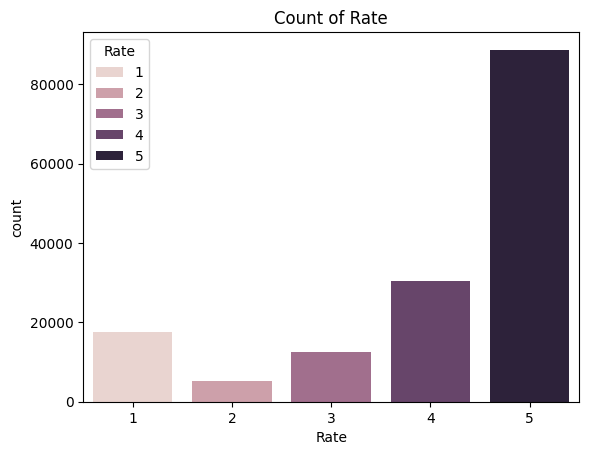

In [ ]:
sns.countplot(x='Rate', data=df, hue = 'Rate')
plt.title('Count of Rate')
plt.show()

In this graph explain most customers giving 5star rating around 120000 and rating 2 is very low is around 6000

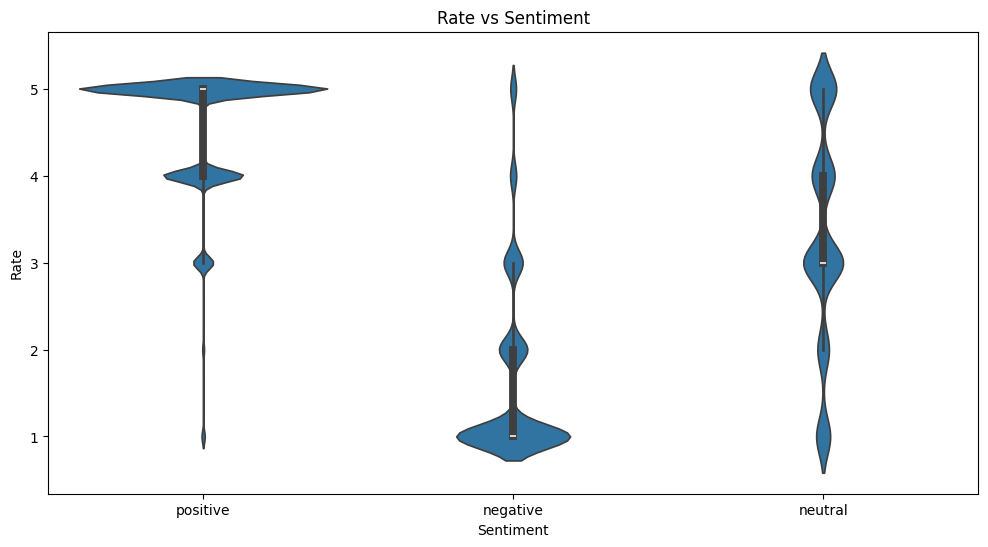

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Sentiment'], y=df['Rate'])
plt.title('Rate vs Sentiment')
plt.show()

1.Positive Sentiment:

The distribution is heavily centered around Rate 5, with a very dense peak at 5, indicating that most of the positive sentiments are accompanied by the highest ratings.
There is also a smaller, secondary peak at Rate 4, indicating a moderate amount of positive sentiments also receiving a rating of 4.
The shape narrows significantly at lower ratings (1 to 3), showing fewer observations with lower ratings in the positive sentiment category.

2.Negative Sentiment:

The distribution is more symmetrical around Rate 1, which dominates the negative sentiment.
A smaller distribution around Rate 3 suggests that some negative sentiments receive a middle-ground rating, but the overall spread is heavily skewed toward the lowest rating (1).

3.Neutral Sentiment:

The distribution shows a bimodal pattern, with peaks at both Rate 3 and Rate 5.
The presence of both high and mid-range ratings suggests that neutral sentiments are not consistently associated with a specific rating and span across different ratings. The density is much lower at extreme ratings (1 and 2).

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
positive,122806
negative,23352
neutral,8306


In [ ]:
df = df[df['Sentiment']!='neutral']# Data is too small

neutral sentiment is far smaller than

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
positive,122806
negative,23352


In this dataset the output is imbalanced.
Using Cost-Sensitive Learning techniq to minimise imbalance of classes.

# Data Preprocessing

In [ ]:

# Downloading Necessary packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocessing(text):

  if not isinstance(text, str):
    text = str(text)

  # Step 1: Convert to lowercase
  text = re.sub(r'[^a-zA-Z\s]','', text)

  # Step 2: Convert to lowercase
  text = text.lower()

  # Step 3: Tokenize text
  tokens = word_tokenize(text)

  # Step 4: Remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [token for token in tokens if token not in stop_words]


  # Step 6: Join tokens back into a single string
  preprocessed_text = ' '.join(filtered_tokens)
  return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Select Features and Target**

In [ ]:
#Concatinating 2 review columns
X = df['Review']+ ' '+df['Summary']

In [ ]:
X

,0
0,super! great cooler excellent air flow and for...
1,awesome best budget 2 fit cooler nice cooling
2,fair the quality is good but the power of air ...
3,useless product very bad product its a only a fan
5,awesome the cooler is really fantastic and pro...
...,...
205044,wonderful superb
205045,terrific good quality products
205046,classy product beautiful set very nice
205049,nice very nice and fast delivery


In [ ]:
#Features
X= list(X.apply(preprocessing))

In [ ]:
X[0]

'super great cooler excellent air flow price amazing unbelievablejust love'

**Label Encoding**

In [ ]:
#Target
Y = np.array(list(df['Sentiment'].apply(lambda x: 1 if x=='positive' else 0)))

In [ ]:
Y

array([1, 1, 1, ..., 1, 1, 1])

**train_test_split**

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Preparing embedding layer

Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then **used as the first layer for the deep learning models in Keras**.

In [ ]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(x_train)

X_train = word_tokenizer.texts_to_sequences(x_train)
X_test = word_tokenizer.texts_to_sequences(x_test)

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

34744

**Padding Sequences***

Padding Sequences: After converting texts to sequences, you often need to pad these sequences to ensure they are of the same length before feeding them into a neural network.

In [ ]:

max_length = 100  # Specify the maximum length for padding
X_train = pad_sequences(X_train, maxlen=100, padding='post')
X_test = pad_sequences(X_test, maxlen=100, padding='post')

In [ ]:
X_train.shape

(116926, 100)

**Embeddings Dictionary**

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Colab Notebooks/Sentiment analysis/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(34744, 100)

# Recurrent Neural Network (CNN-LSTM)

In [ ]:
#CNN-LSTM Model Architecture

model = Sequential()
embedding_layer = Embedding(input_dim=vocab_length,
                            output_dim=100,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)
model.add(embedding_layer)
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(max_length, 100)))
model.add(MaxPooling1D(pool_size=2))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(LSTM(128, return_sequences = True))

model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32, return_sequences = True))


model.add(LSTM(16, return_sequences = False))

model.add(BatchNormalization())

model.add(Dense(8, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001)))

# Model compiling
optimize=Adam(learning_rate=0.00004)
model.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['accuracy'])


# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Create a ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       3,474,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,474,400 (13.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,474,400 (13.25 MB)

# Cost-Sensitive Learning

Cost-Sensitive Learning is particularly useful in cases where the misclassification of certain classes or outcomes is more costly than others. When applying this to a project involving Long Short-Term Memory (LSTM) networks, especially for tasks like classification, you need to adjust the model to give more weight to certain types of errors during training. This ensures the model is penalized more for making high-cost mistakes.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

# Convert class_weights to dictionary format
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
class_weight_dict

{0: 3.121522772171499, 1: 0.5953644205016446}

# Model building

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=30,
    verbose=1,
    callbacks=[ reduce_lr,early_stopping],
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict)


# Model Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.title('Model Loss')
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)  # Add grid lines for better readability
# Show plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

914/914 ━━━━━━━━━━━━━━━━━━━━ 164s 175ms/step


array([[0.9750686 ],
       [0.9790041 ],
       [0.97917336],
       ...,
       [0.9688713 ],
       [0.9160888 ],
       [0.6996086 ]], dtype=float32)

In [ ]:

y_pred_class = (np.array(y_pred) >= 0.5).astype(int).ravel()
y_pred_class

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
result=pd.DataFrame({'Actual output': y_test,'Predict Output': y_pred_class})
result


,Actual output,Predict Output
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
29227,1,1
29228,1,1
29229,1,1
29230,1,1


In [ ]:
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 4253   370]
 [  968 23641]]


True Negative (TN) = 4253: These are instances where the actual class was negative (e.g., class 0), and the model correctly predicted them as negative.

False Positive (FP) = 370: These are instances where the actual class was negative, but the model incorrectly predicted them as positive. This is also known as a "Type I error."

False Negative (FN) = 968: These are instances where the actual class was positive (e.g., class 1), but the model incorrectly predicted them as negative. This is also called a "Type II error."

True Positive (TP) = 23641: These are instances where the actual class was positive, and the model correctly predicted them as positive.

In [ ]:
# Classification report
cr = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4623
           1       0.98      0.96      0.97     24609

    accuracy                           0.95     29232
   macro avg       0.90      0.94      0.92     29232
weighted avg       0.96      0.95      0.96     29232



Class 0 (Negative Class)

Precision = 0.81: When the model predicts class 0, it is correct 69% of the time.
Recall = 0.92: The model correctly identifies 87% of the actual class 0 instances.
F1-score = 0.86: A balanced score considering both precision and recall for class 0.
Support = 4623: There are 4623 instances of class 0 in y_test.
Class 1 (Positive Class)

Precision = 0.98: When the model predicts class 1, it is correct 97% of the time.
Recall = 0.96: The model correctly identifies 93% of the actual class 1 instances.
F1-score = 0.97: High F1-score indicates strong performance in predicting class 1.
Support = 24609: There are 24609 instances of class 1 in y_test.

# Download Model

In [ ]:
joblib.dump(model, 'CNN_LSTM_model.joblib')

#Load Model

In [ ]:
pretrained_model = load('/content/drive/MyDrive/Colab Notebooks/Sentiment analysis/CNN_LSTM_model.joblib')

In [ ]:
def embedding(text):
  text = word_tokenizer.texts_to_sequences(text)
  text = pad_sequences(text, maxlen=100, padding='post')
  return text

# New Section

In [ ]:
def predict(text):
  text = preprocessing(text)

  text = embedding(text)

  prediction = pretrained_model.predict(text)

  prediction = (np.array(prediction) >= 0.5).astype(int).ravel()

  sentiment = 'Positive ' if prediction[0] >=0.5  else 'Negative'

  return sentiment

# Review Prediction

###apple iphone 11 white 128 gb###

![link text](https://5.imimg.com/data5/WJ/BC/UX/SELLER-6131802/apple-iphone-11-128gb-.jpg)

In [ ]:
Battery = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sentiment analysis/Battery_Review.csv")

In [ ]:
Display = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sentiment analysis/Display_Review.csv")

In [ ]:
Camera = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sentiment analysis/Camera_Review.csv")

In [ ]:
performance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sentiment analysis/Performance_Review.csv")

In [ ]:
Overall = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sentiment analysis/Overall_Review.csv")

In [ ]:
Battery.head()

,Battery_Review_Title,Battery_Review,Battery_Reviewer_Name,Battery_Reviewer_Location,Battery_Review_Date,Battery_Review_Likes,Battery_Review_Dislikes
0,worth every penny,the main issue with my 8 was battery and this ...,flipkart customer,thiruvananthapuram,201911,2718,644
1,terrific purchase,battery is 3110mah sufficient amount if you re...,faizan haidri,gaya,202104,15,4
2,worth every penny,let me explain you guys about camera display b...,arshad ahmed,new delhi,202001,4081,940
3,fabulous,at last apple with gud battery performance,rahul bajaj,amritsar,201912,0,1
4,terrific,battery 5 star comparing to xr iphone 11 have ...,rahul kumar soni,gurugram,201910,14,4


In [ ]:
Display.head()

,Display_Review_Title,Display_Review,Display_Reviewer_Name,Display_Reviewer_Location,Display_Review_Date,Display_Review_Likes,Display_Review_Dislikes
0,highly recommended,display you can t complain about display when ...,sagar chaudhary,new delhi,202004,6,0
1,must buy,honestly iphone x display is far better than i...,ankur kumar,gurugram,202007,2,1
2,wonderful,works seamlessly i get an avg 1 5 days battery...,praj kum,bengaluru,201912,5,1
3,very good,although the phone display is 720p but it does...,sahaj deep singh,baramula,202104,2,0
4,worth the money,as i shifted from android which has amoled dis...,ajay grover,narnaul,202104,2,1


In [ ]:
Camera.head()

,Camera_Review_Title,Camera_Review,Camera_Reviewer_Name,Camera_Reviewer_Location,Camera_Review_Date,Camera_review_Likes,Camera_Review_Dislikes
0,classy product,camera back camera is good and also provide go...,ajith s,chennai,202211,6.0,1.0
1,just wow,camera is unmatchable takes dslr quality photos,karun sharma,new delhi,202005,7.0,6.0
2,terrific purchase,this is my first iphone the camera quality is ...,deshraj verma,jaipur,202107,6.0,2.0
3,great product,camera quality is just superb in indoor lighti...,amit chaudhary,haldwani,202104,6.0,4.0
4,wonderful,camera quality is just awesome and the major f...,amrinder mehta,jalandhar,202006,288.0,87.0


In [ ]:
performance.head()

,Performance_Review_Title,Performance_Review,Performance_Reviewer_Name,Performance_Reviewer_Location,Performance_Review_Date,Performance_Review_Likes,Performance_Review_Dislikes
0,mind blowing purchase,performance suprb beats evry movement,harin kumar,hyderabad,202103,1,1
1,worth the money,3 performance is good by if you compare it wit...,abhishek pathak,basti,202108,2,8
2,excellent,super performance which is equal to 11pro,balamurugan adhithan,new delhi,202008,4,0
3,just wow,great phone for pubg lovers and high intensity...,rohit roy,champdani,202003,1,0
4,highly recommended,gaming performance is excellent,dinesh kumar ganeshon,vijayawada,202104,8,2


In [ ]:
Overall.head()

,Rating,Review_Title,Review,Reviewer_Name,Reviewer_Location,Review_Date,Review_Likes,Review_Dislikes
0,5,perfect product,photos super,siva sankar,thorapadi,202305,1532,155
1,5,best in the market,good camera,steevan rattra,ludhiana,201911,8220,917
2,5,worth every penny,feeling awesome after getting the delivery of ...,abhishek sachdeva,kurukshetra,202001,5706,628
3,5,classy product,camera is awesome best battery backup a perfor...,vishnu ramakrishnan,perinthalmanna,202104,2958,315
4,5,super,good product i love iphone,mukesh thakor,deesa,202006,231,17


In [ ]:
Battery_text = Battery['Battery_Review_Title']+' '+Battery['Battery_Review']

In [ ]:
Display_text = Display['Display_Review_Title']+' '+Display['Display_Review']

In [ ]:
Camera_text = Camera['Camera_Review_Title']+' '+Camera['Camera_Review']

In [ ]:
Performance_text = performance['Performance_Review_Title']+' '+performance['Performance_Review']

In [ ]:
Overall_text = Overall['Review_Title']+' '+Overall['Review']

In [ ]:
Battery_result = Battery_text.apply(predict)
Display_result = Display_text.apply(predict)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/

In [ ]:
performance_result = Performance_text.apply(predict)
Overall_result = Overall_text.apply(predict)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1

In [ ]:
Camera_result = Camera_text.apply(predict)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms

# Test with New Data

In [ ]:
Battery['sentiment']=Battery_result

In [ ]:
Display['sentiment']=Display_result

In [ ]:
Camera['sentiment']=Camera_result

In [ ]:
performance['sentiment']=performance_result

In [ ]:
Overall['sentiment']=Overall_result

In [ ]:
Battery.head()

,Battery_Review_Title,Battery_Review,Battery_Reviewer_Name,Battery_Reviewer_Location,Battery_Review_Date,Battery_Review_Likes,Battery_Review_Dislikes,sentiment
0,worth every penny,the main issue with my 8 was battery and this ...,flipkart customer,thiruvananthapuram,201911,2718,644,Positive
1,terrific purchase,battery is 3110mah sufficient amount if you re...,faizan haidri,gaya,202104,15,4,Positive
2,worth every penny,let me explain you guys about camera display b...,arshad ahmed,new delhi,202001,4081,940,Positive
3,fabulous,at last apple with gud battery performance,rahul bajaj,amritsar,201912,0,1,Positive
4,terrific,battery 5 star comparing to xr iphone 11 have ...,rahul kumar soni,gurugram,201910,14,4,Positive


In [ ]:
Display.head()

,Display_Review_Title,Display_Review,Display_Reviewer_Name,Display_Reviewer_Location,Display_Review_Date,Display_Review_Likes,Display_Review_Dislikes,sentiment
0,highly recommended,display you can t complain about display when ...,sagar chaudhary,new delhi,202004,6,0,Positive
1,must buy,honestly iphone x display is far better than i...,ankur kumar,gurugram,202007,2,1,Positive
2,wonderful,works seamlessly i get an avg 1 5 days battery...,praj kum,bengaluru,201912,5,1,Positive
3,very good,although the phone display is 720p but it does...,sahaj deep singh,baramula,202104,2,0,Positive
4,worth the money,as i shifted from android which has amoled dis...,ajay grover,narnaul,202104,2,1,Positive


In [ ]:
Camera.head()

,Camera_Review_Title,Camera_Review,Camera_Reviewer_Name,Camera_Reviewer_Location,Camera_Review_Date,Camera_review_Likes,Camera_Review_Dislikes,sentiment
0,classy product,camera back camera is good and also provide go...,ajith s,chennai,202211,6.0,1.0,Negative
1,just wow,camera is unmatchable takes dslr quality photos,karun sharma,new delhi,202005,7.0,6.0,Positive
2,terrific purchase,this is my first iphone the camera quality is ...,deshraj verma,jaipur,202107,6.0,2.0,Positive
3,great product,camera quality is just superb in indoor lighti...,amit chaudhary,haldwani,202104,6.0,4.0,Positive
4,wonderful,camera quality is just awesome and the major f...,amrinder mehta,jalandhar,202006,288.0,87.0,Positive


In [ ]:
performance.head()

,Performance_Review_Title,Performance_Review,Performance_Reviewer_Name,Performance_Reviewer_Location,Performance_Review_Date,Performance_Review_Likes,Performance_Review_Dislikes,sentiment
0,mind blowing purchase,performance suprb beats evry movement,harin kumar,hyderabad,202103,1,1,Positive
1,worth the money,3 performance is good by if you compare it wit...,abhishek pathak,basti,202108,2,8,Positive
2,excellent,super performance which is equal to 11pro,balamurugan adhithan,new delhi,202008,4,0,Positive
3,just wow,great phone for pubg lovers and high intensity...,rohit roy,champdani,202003,1,0,Positive
4,highly recommended,gaming performance is excellent,dinesh kumar ganeshon,vijayawada,202104,8,2,Positive


In [ ]:
Overall.head()

,Rating,Review_Title,Review,Reviewer_Name,Reviewer_Location,Review_Date,Review_Likes,Review_Dislikes,sentiment
0,5,perfect product,photos super,siva sankar,thorapadi,202305,1532,155,Positive
1,5,best in the market,good camera,steevan rattra,ludhiana,201911,8220,917,Negative
2,5,worth every penny,feeling awesome after getting the delivery of ...,abhishek sachdeva,kurukshetra,202001,5706,628,Positive
3,5,classy product,camera is awesome best battery backup a perfor...,vishnu ramakrishnan,perinthalmanna,202104,2958,315,Negative
4,5,super,good product i love iphone,mukesh thakor,deesa,202006,231,17,Positive


from this graph explain most customers are happy about the battery perfomance of this model

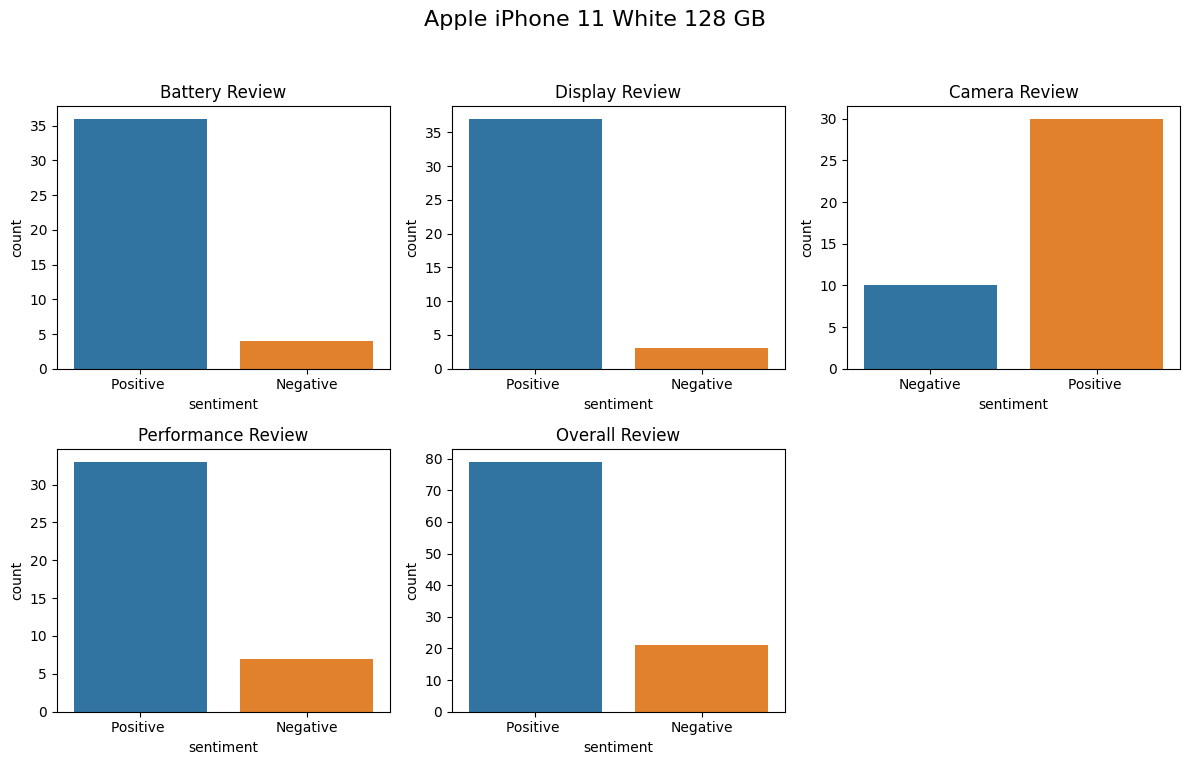

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and title
plt.figure(figsize=(12, 8))
plt.suptitle("Apple iPhone 11 White 128 GB", fontsize=16)

# Plot 1: Battery Review
plt.subplot(2, 3, 1)
sns.countplot(x='sentiment', data=Battery, hue='sentiment')
plt.title('Battery Review')

# Plot 2: Display Review
plt.subplot(2, 3, 2)
sns.countplot(x='sentiment', data=Display, hue='sentiment')
plt.title('Display Review')

# Plot 3: Camera Review
plt.subplot(2, 3, 3)
sns.countplot(x='sentiment', data=Camera, hue='sentiment')
plt.title('Camera Review')

# Plot 4: Performance Review
plt.subplot(2, 3, 4)
sns.countplot(x='sentiment', data=performance, hue='sentiment')
plt.title('Performance Review')

# Plot 4: Overall Review
plt.subplot(2, 3, 5)
sns.countplot(x='sentiment', data=Overall, hue='sentiment')
plt.title('Overall Review')

# Show all plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the main title
plt.show()


##Battery Review:

Most reviews are positive, with a count of about 35.
A small number of reviews, around 5, are negative.
##Display Review:

Similar to Battery, Display reviews are overwhelmingly positive, with approximately 35 positive reviews.
There are only a few negative reviews, roughly 5.
##Camera Review:

Camera reviews show a strong positive sentiment, with approximately 30 positive reviews.
Negative reviews are also present but fewer, at around 10.
##Performance Review:

The majority of Performance reviews are positive, with a count of around 30.
A smaller number, about 5, are negative.
##Overall Review:

This subplot combines all aspects, showing the overall sentiment toward the iPhone model.
There is a strong positive sentiment overall, with around 75 positive reviews.
Negative reviews account for about 20, which is higher than individual aspect ratings but still much lower than the positives.
##Summary:
Across all features, positive sentiment is significantly higher than negative sentiment, indicating that users generally have favorable opinions about the iPhone 11 White 128 GB, with particularly strong satisfaction in the Display and Battery categories. The Camera feature, while still positive, has a slightly higher count of negative reviews compared to the others.

# Future Update

####Pipeline:
To enhance the efficiency, scalability, and maintainability of our project by incorporating pipeline techniques. This will allow for streamlined data processing, modular code design, and automation of complex workflows.